#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [3]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [4]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [5]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [6]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [7]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
model = Sequential()

In [10]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#卷積層2與池化層2

In [14]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [18]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(10, activation='softmax'))

In [21]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [26]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [27]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 216s 5ms/step - loss: 0.0897 - acc: 0.1268 - val_loss: 0.0893 - val_acc: 0.1743
Epoch 2/10
40000/40000 [==============================] - 210s 5ms/step - loss: 0.0887 - acc: 0.1656 - val_loss: 0.0884 - val_acc: 0.2255
Epoch 3/10
40000/40000 [==============================] - 210s 5ms/step - loss: 0.0871 - acc: 0.2064 - val_loss: 0.0869 - val_acc: 0.2583
Epoch 4/10
40000/40000 [==============================] - 211s 5ms/step - loss: 0.0851 - acc: 0.2442 - val_loss: 0.0852 - val_acc: 0.2808
Epoch 5/10
40000/40000 [==============================] - 212s 5ms/step - loss: 0.0835 - acc: 0.2686 - val_loss: 0.0838 - val_acc: 0.3041
Epoch 6/10
40000/40000 [==============================] - 214s 5ms/step - loss: 0.0824 - acc: 0.2918 - val_loss: 0.0831 - val_acc: 0.3184
Epoch 7/10
40000/40000 [==============================] - 208s 5ms/step - 

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('MSE Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

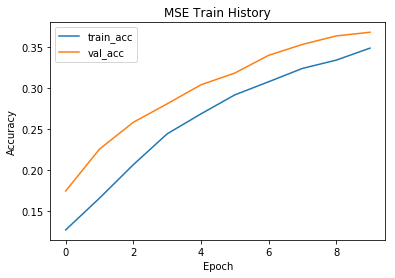

In [35]:
show_train_history('acc','val_acc')

In [36]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [37]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 137s 4ms/step - loss: 0.2723 - acc: 0.9032 - val_loss: 0.2780 - val_acc: 0.9007
Epoch 2/12
37500/37500 [==============================] - 134s 4ms/step - loss: 0.2704 - acc: 0.9034 - val_loss: 0.2764 - val_acc: 0.9007
Epoch 3/12
37500/37500 [==============================] - 139s 4ms/step - loss: 0.2685 - acc: 0.9036 - val_loss: 0.2751 - val_acc: 0.9007
Epoch 4/12
37500/37500 [==============================] - 129s 3ms/step - loss: 0.2668 - acc: 0.9041 - val_loss: 0.2735 - val_acc: 0.9008
Epoch 5/12
37500/37500 [==============================] - 135s 4ms/step - loss: 0.2651 - acc: 0.9039 - val_loss: 0.2724 - val_acc: 0.9008
Epoch 6/12
37500/37500 [==============================] - 143s 4ms/step - loss: 0.2634 - acc: 0.9043 - val_loss: 0.2706 - val_acc: 0.9009
Epoch 7/12
37500/37500 [==============================] - 132s 4ms/step - loss: 0.2617 - acc: 0.9045 - val_loss: 0.2689 - 

In [38]:
#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('binary _crossentropy Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

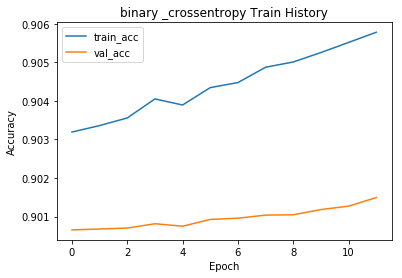

In [39]:
show_train_history('acc','val_acc')